In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
np.random.seed(7)

In [2]:
df=pd.read_csv("/home/sh4n1/miniproj/h1cpudata.csv",usecols=[1])

In [3]:
df.head()

,Timestamp,cpu_usage
0,1376314846,10912.027692
1,1376315146,10890.570362
2,1376315446,10434.114431
3,1376315746,10539.450415
4,1376316046,10951.041020


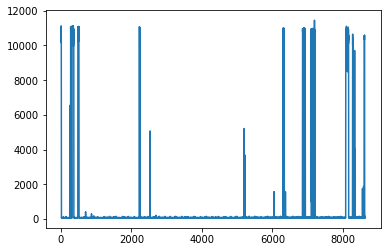

In [4]:
plt.plot(df['cpu_usage'])
#plt.xlim(0,20)
plt.show()

In [13]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = df.values
dataset = dataset.astype('float32')
dataset = scaler.fit_transform(dataset)

In [11]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [14]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2021-11-10 21:53:38.688231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
5780/5780 - 21s - loss: 0.0030
Epoch 2/100
5780/5780 - 23s - loss: 0.0021
Epoch 3/100
5780/5780 - 20s - loss: 0.0020
Epoch 4/100
5780/5780 - 19s - loss: 0.0017
Epoch 5/100
5780/5780 - 19s - loss: 0.0015
Epoch 6/100
5780/5780 - 20s - loss: 0.0015
Epoch 7/100
5780/5780 - 4s - loss: 0.0014
Epoch 8/100
5780/5780 - 19s - loss: 0.0014
Epoch 9/100
5780/5780 - 20s - loss: 0.0014
Epoch 10/100
5780/5780 - 20s - loss: 0.0014
Epoch 11/100
5780/5780 - 20s - loss: 0.0014
Epoch 12/100
5780/5780 - 20s - loss: 0.0013
Epoch 13/100
5780/5780 - 20s - loss: 0.0014
Epoch 14/100
5780/5780 - 20s - loss: 0.0013
Epoch 15/100
5780/5780 - 20s - loss: 0.0014
Epoch 16/100
5780/5780 - 20s - loss: 0.0013
Epoch 17/100
5780/5780 - 20s - loss: 0.0014
Epoch 18/100
5780/5780 - 20s - loss: 0.0014
Epoch 19/100
5780/5780 - 20s - loss: 0.0013
Epoch 20/100
5780/5780 - 20s - loss: 0.0014
Epoch 21/100
5780/5780 - 20s - loss: 0.0013
Epoch 22/100
5780/5780 - 20s - loss: 0.0013
Epoch 23/100
5780/5780 - 20s - loss: 0.001

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [25]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 391.39 RMSE
Test Score: 953.44 RMSE


In [26]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [27]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [1]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlim(0,20)
plt.show()

NameError: name 'plt' is not defined

In [29]:
model.save('lstm.h5')